In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.io as sio


### Create and fit the model

In [274]:
# import the data
Data = sio.loadmat('widget_data.mat')
data = Data['data'].T

# Dependent variable 'y'
widsold = data[:,2]

# Independent variables (Coefficients: intercept, time and age)
X = np.concatenate([np.ones([1000,1]),data[:,0:2]],axis=1)

print(np.shape(X))
print(np.shape(np.ones([1000,1])))
print(np.shape(data[:,0:2]))
XtX = X.T@X
Xty = X.T@widsold

# Beta
b1 = np.linalg.inv(XtX)@Xty
b2 = np.linalg.solve(XtX,Xty)
b3 = np.linalg.lstsq(X,widsold,rcond=None)[0]
bscaled = b3/np.std(X)

print(b3)
print(bscaled)

(1000, 3)
(1000, 1)
(1000, 2)
[10.39825387  0.84694924 -0.18010547]
[ 0.72483518  0.05903862 -0.01255468]


### Plots

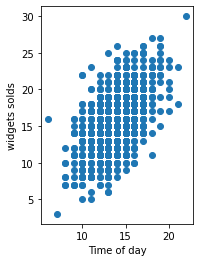

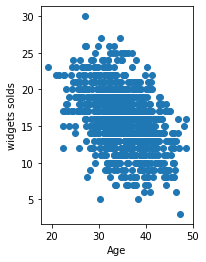

In [277]:
plt.subplot(121)
plt.scatter(X[:,1],widsold)
plt.xlabel('Time of day')
plt.ylabel('widgets solds')
plt.show()

plt.subplot(122)
plt.scatter(X[:,2],widsold)
plt.xlabel('Age')
plt.ylabel('widgets solds')
plt.show()

### Computing R-squared

In [267]:
# How well the model fits the data. R2 is the proportion of variance in the 
# dependent variable that is explained by the design matrix X.

epsilon = X@b3-widsold
widsoldavg = np.mean(widsold)

R2num = sum((epsilon)**2)
R2den = sum((widsold-widsoldavg)**2)

R2 = 1-(R2num/R2den)

print(R2)

0.36639013086264105
